# Programming Assignment # 4 Clustering

## Student Details

Group members name with ID:-

Varun Adit Dhamudaran Sathish- 1001944885<br>
Subhash Duggirala- 1001965810<br>
Supreetha Darbha - 1002035242

--> Everyone should make sure to follow all the instructions given in the assignment, Marks would be deducted if not.

--> Any cheating including plagarism, Will be reported to the corresponding UTA's instance.

--> DO NOT FORGET TO CITE YOUR REFERENCES.

--> Make sure to explain each of your work.

**DO NOT DELETE THIS CELL**


Submission Instructions:-

--> Create a folder and name it 'lastname_firstname_yourNetId_PA4'

--> Rename the submission file as 'lastname_firstname_yourNetId_PA4.ipynb'

--> Zip the fodler and submit it to canvas. Submission folder should be 'lastname_firstname_yourNetId_PA4.ZIP'

## Assignment Details

In this assignment you will learn about cluster using K-means clustering and Hierarchical Agglomerative clustering for predicted and actual values.

Each team will have a total of 3 .ipynb file. Each member will work on a different dataset.csv


You have 3 dataset files:-
1)DataSet_1

2)DataSet_2

3)DataSet_3

REPORT:

Make a 4-5 minutes video to explain what you have done and what did you learn from it. - 10 points




In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [3]:
data = pd.read_csv("Dataset_3.csv", index_col=0)

data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
data.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [5]:
data.loc[data['Grad.Rate'] > 100, 'Grad.Rate']

Cazenovia College    118
Name: Grad.Rate, dtype: int64

In [6]:
data.loc[data['Grad.Rate'] > 100, 'Grad.Rate'] = 100
data.loc[data['Grad.Rate'] > 100, 'Grad.Rate']

Series([], Name: Grad.Rate, dtype: int64)

In [7]:
data.loc[data['PhD'] > 100, 'PhD']

Texas A&M University at Galveston    103
Name: PhD, dtype: int64

In [8]:
data.loc[data['PhD'] > 100, 'PhD']=100
data.loc[data['PhD'] > 100, 'PhD']

Series([], Name: PhD, dtype: int64)

In [9]:
data['Private']=data['Private'].map({'Yes':1,"No":0})

#y=data['Private']

#data.drop(['Private'],inplace=True,axis=1)

#data.drop(index=['Northeastern University', 'University of Minnesota Twin Cities', 'University of South Florida'],inplace=True)


In [10]:
from sklearn import preprocessing

minmax_processed = preprocessing.MinMaxScaler().fit_transform(data)

In [11]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=data.index, columns=data.columns)

df_numeric_scaled.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1.0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.673913,0.710526,0.418231,0.187500,0.072671,0.555556
Adelphi University,1.0,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.228261,0.078947,0.260054,0.250000,0.138387,0.511111
Adrian College,1.0,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.489130,0.552632,0.278820,0.468750,0.104605,0.488889
Agnes Scott College,1.0,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.913043,0.960526,0.139410,0.578125,0.298415,0.544444
Alaska Pacific University,1.0,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.739130,0.631579,0.252011,0.031250,0.145833,0.055556


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

C:\Users\adtvr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


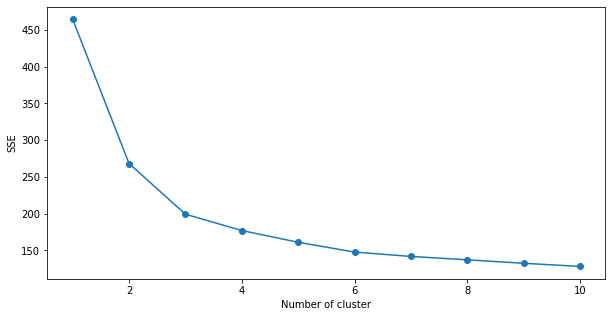

In [12]:
#########################begin code for Task 1-a - 10 Points

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(df_numeric_scaled)
    df_numeric_scaled["clusters"] = kmeans.labels_
    sse[k] = (kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()), '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Describe which is the optimal value for K and explain why you choose it as the optimal value


### Task 1-b: Visualization for K-Means Clustering 

--> Performing k-means clustering for k=3,4,5 and visualize the predicted training samples and actual training samples on scatter plots. 

--> Use 75% of the dataset for training and 25% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

--> Visualize predicted training samples and actual training samples on two scatter plots.Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA.You can easily apply PCA to your data with the help of scikit-learn.



In [13]:
from sklearn.preprocessing import StandardScaler
#Now we will do feature scaling using standrd scaler

sc = StandardScaler()
#df_1 = sc.fit_transform(df_numeric_scaled)
df_1 = sc.fit_transform(data.drop('Private', axis=1))
df_1

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.17992933e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51804628e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.68710475e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.60975094e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.96167109e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.96167109e+00]])

In [14]:
from sklearn.decomposition import PCA
#Now we will reduce the number of features in the dataset using Principal Component Analysis

pca = PCA(2)
X_pca = pca.fit_transform(df_1)
X_pca

array([[-1.59326614,  0.76460695],
       [-2.19336286, -0.58128464],
       [-1.43055073, -1.09459827],
       ...,
       [-0.73411642, -0.07775861],
       [ 7.9236966 , -2.05736652],
       [-0.46473091,  0.36392907]])

In [15]:
pca_dataframe = pd.DataFrame(X_pca, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = data["Private"]
for i in range(pca_dataframe.shape[0]):
    pca_dataframe["Cluster"][i] = data["Private"][i]
pca_dataframe

,PCA 1,PCA 2,Cluster
0,-1.593266,0.764607,1.0
1,-2.193363,-0.581285,1.0
2,-1.430551,-1.094598,1.0
3,2.857892,-2.626056,1.0
4,-2.217344,0.020351,1.0
...,...,...,...
772,-3.331878,1.216020,0.0
773,0.202841,-0.687322,1.0
774,-0.734116,-0.077759,1.0
775,7.923697,-2.057367,1.0


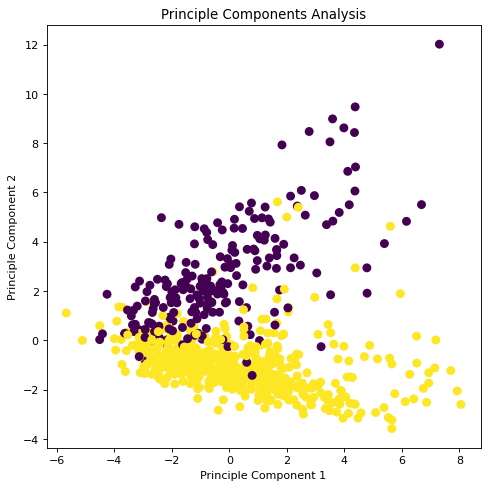

In [16]:
#Plotting a graph after doing pca

plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams["figure.dpi"] = 80
plt.scatter(x=pca_dataframe["PCA 1"], y=pca_dataframe["PCA 2"], lw=2, c=pca_dataframe["Cluster"])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Principle Components Analysis")
plt.show()

In [17]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail - 5 points

### Important!!!

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

y = pca_dataframe['Cluster']
X = pca_dataframe.drop('Cluster', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)


print("X-Train Shape: ",X_train.shape) 
print("X-Test Shape: ",X_test.shape)
print("Y-Train Shape: ",y_train.shape)
print("Y-Test Shape: ",y_test.shape)


###################end code for Task 1-b-1

X-Train Shape:  (582, 2)
X-Test Shape:  (195, 2)
Y-Train Shape:  (582,)
Y-Test Shape:  (195,)


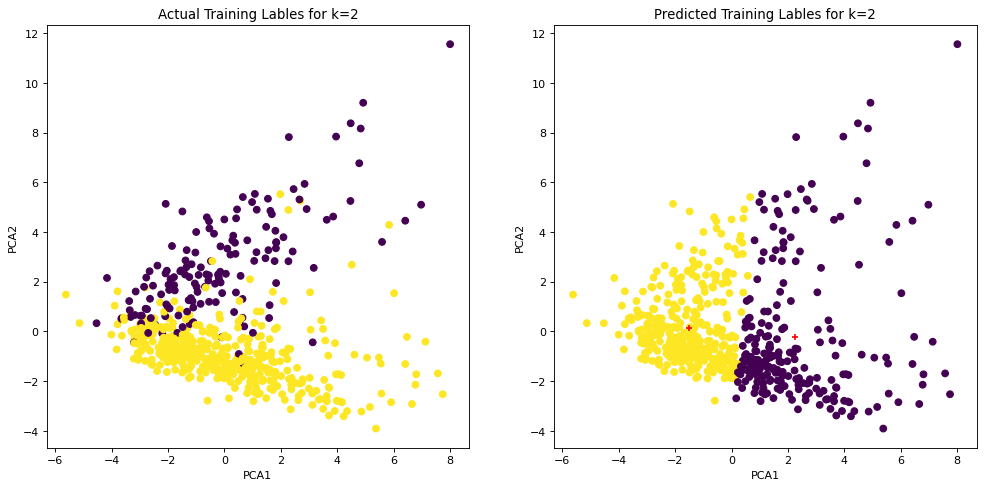

In [18]:

####Task 1-b-2: Visualize the predicted training labels vs actual training labels - 10 points
# Import PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Create the KMeans model
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 2021)
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2021)
kmeans4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 2021)
kmeans5 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 2021)

# Compute cluster centers and predict cluster index for each sample 

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

train_kmeans2 = kmeans2.fit_predict(X_train_pca)
train_kmeans3 = kmeans3.fit_predict(X_train_pca)
train_kmeans4 = kmeans4.fit_predict(X_train_pca)
train_kmeans5 = kmeans5.fit_predict(X_train_pca)


# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.scatter(x= X_train_pca[:,0], y= X_train_pca[:,1], c=y_train)
ax2.scatter(x= X_train_pca[:,0], y =X_train_pca[:,1], c=train_kmeans2)
ax2.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],marker='+',zorder=10, c='red', label = 'Centroids')

ax1.set(xlabel='PCA1', ylabel='PCA2')
ax2.set(xlabel='PCA1', ylabel='PCA2')

ax1.title.set_text("Actual Training Lables for k=2")
ax2.title.set_text("Predicted Training Lables for k=2")




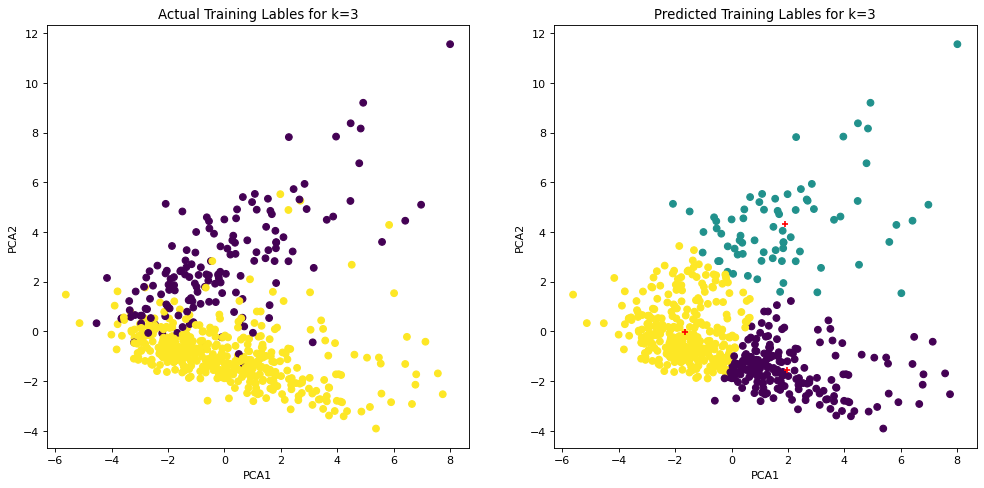

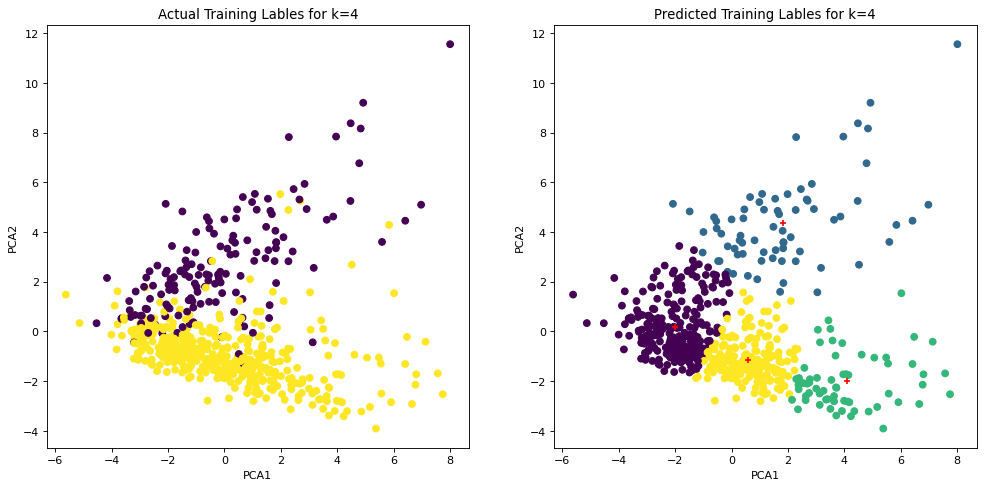

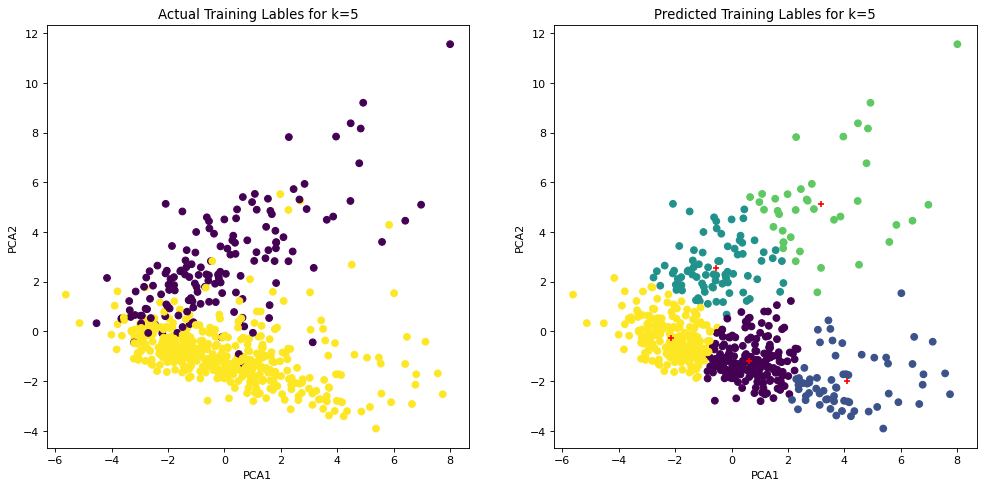

In [19]:
## Visualize using K=3,4,5 as well

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.scatter(x= X_train_pca[:,0], y= X_train_pca[:,1], c=y_train)
ax2.scatter(x= X_train_pca[:,0], y =X_train_pca[:,1], c=train_kmeans3)
ax2.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1],marker='+',zorder=10, c='red', label = 'Centroids')

ax1.set(xlabel='PCA1', ylabel='PCA2')
ax2.set(xlabel='PCA1', ylabel='PCA2')

ax1.title.set_text("Actual Training Lables for k=3")
ax2.title.set_text("Predicted Training Lables for k=3")

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,7))

ax3.scatter(x= X_train_pca[:,0], y= X_train_pca[:,1], c=y_train)
ax4.scatter(x= X_train_pca[:,0], y =X_train_pca[:,1], c=train_kmeans4)
ax4.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1],marker='+',zorder=10, c='red', label = 'Centroids')

ax3.set(xlabel='PCA1', ylabel='PCA2')
ax4.set(xlabel='PCA1', ylabel='PCA2')

ax3.title.set_text("Actual Training Lables for k=4")
ax4.title.set_text("Predicted Training Lables for k=4")

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(15,7))

ax5.scatter(x= X_train_pca[:,0], y= X_train_pca[:,1], c=y_train)
ax6.scatter(x= X_train_pca[:,0], y =X_train_pca[:,1], c=train_kmeans5)
ax6.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1],marker='+',zorder=10, c='red', label = 'Centroids')

ax5.set(xlabel='PCA1', ylabel='PCA2')
ax6.set(xlabel='PCA1', ylabel='PCA2')

ax5.title.set_text("Actual Training Lables for k=5")
ax6.title.set_text("Predicted Training Lables for k=5")


#####end Task 1-b-2

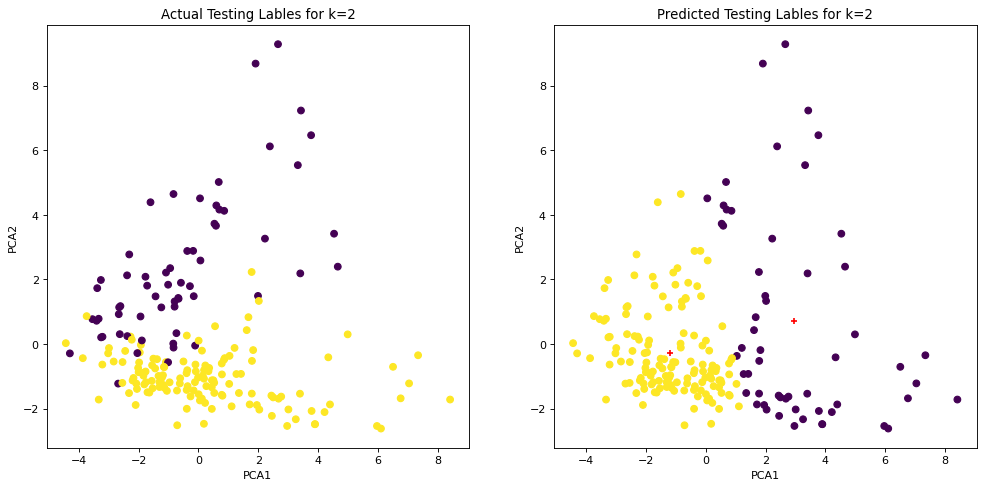

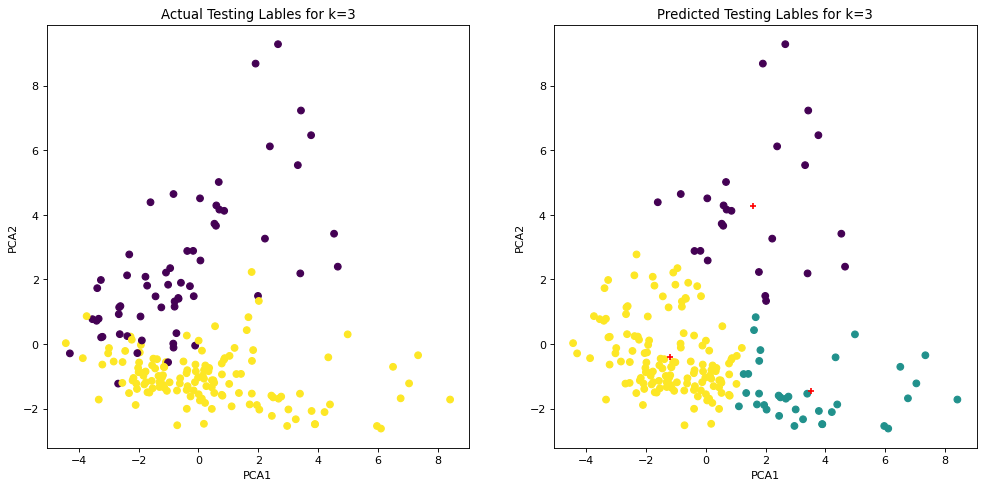

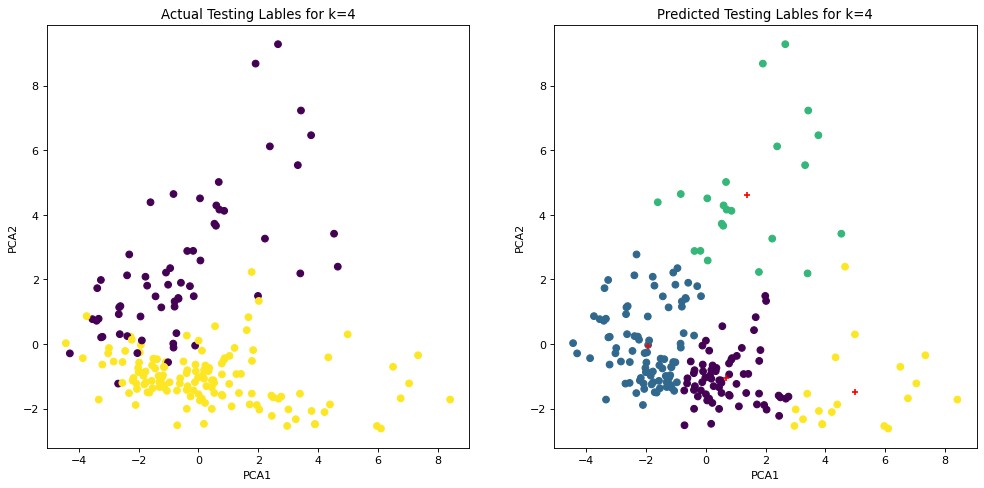

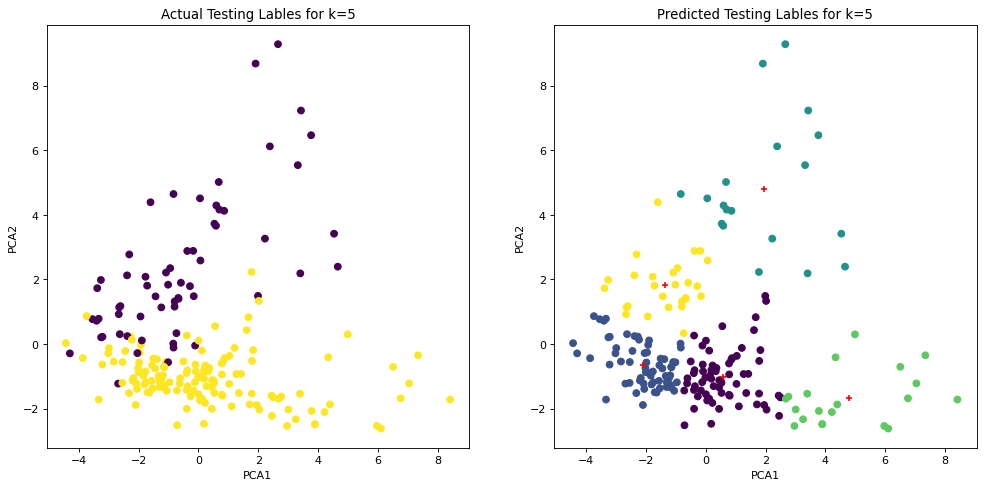

In [20]:
#### Task 1-b-3: Visualize the predicted testing labels vs actual testing labels - 10 Points


# predict cluster index for each sample 

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

test_kmeans2 = kmeans2.fit_predict(X_test_pca)
test_kmeans3 = kmeans3.fit_predict(X_test_pca)
test_kmeans4 = kmeans4.fit_predict(X_test_pca)
test_kmeans5 = kmeans5.fit_predict(X_test_pca)


# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.scatter(x= X_test_pca[:,0], y= X_test_pca[:,1], c=y_test)
ax2.scatter(x= X_test_pca[:,0], y =X_test_pca[:,1], c=test_kmeans2)
ax2.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],marker='+',zorder=10, c='red', label = 'Centroids')

ax1.set(xlabel='PCA1', ylabel='PCA2')
ax2.set(xlabel='PCA1', ylabel='PCA2')



fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(15,7))

ax7.scatter(x= X_test_pca[:,0], y= X_test_pca[:,1], c=y_test)
ax8.scatter(x= X_test_pca[:,0], y =X_test_pca[:,1], c=test_kmeans3)
ax8.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1],marker='+',zorder=10, c='red', label = 'Centroids')

ax7.set(xlabel='PCA1', ylabel='PCA2')
ax8.set(xlabel='PCA1', ylabel='PCA2')


fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,7))

ax3.scatter(x= X_test_pca[:,0], y= X_test_pca[:,1], c=y_test)
ax4.scatter(x= X_test_pca[:,0], y =X_test_pca[:,1], c=test_kmeans4)
ax4.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1],marker='+',zorder=10, c='red', label = 'Centroids')

ax3.set(xlabel='PCA1', ylabel='PCA2')
ax4.set(xlabel='PCA1', ylabel='PCA2')


fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(15,7))

ax5.scatter(x= X_test_pca[:,0], y= X_test_pca[:,1], c=y_test)
ax6.scatter(x= X_test_pca[:,0], y =X_test_pca[:,1], c=test_kmeans5)
ax6.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1],marker='+',zorder=10, c='red', label = 'Centroids')

ax5.set(xlabel='PCA1', ylabel='PCA2')
ax6.set(xlabel='PCA1', ylabel='PCA2')

ax1.title.set_text("Actual Testing Lables for k=2")
ax2.title.set_text("Predicted Testing Lables for k=2")

ax7.title.set_text("Actual Testing Lables for k=3")
ax8.title.set_text("Predicted Testing Lables for k=3")

ax3.title.set_text("Actual Testing Lables for k=4")
ax4.title.set_text("Predicted Testing Lables for k=4")


ax5.title.set_text("Actual Testing Lables for k=5")
ax6.title.set_text("Predicted Testing Lables for k=5")





####end Task 1-b-3

In [21]:
######Task 1-b-4: you need to provide the evaluation of your clustering model. 
#Print out a 2D confusion matrix and Print out a 2-D confusion matrix for all K values calculated above - 05 Points
from sklearn.metrics import confusion_matrix,classification_report

print("Confusion matrix for k = 2\n",confusion_matrix(y_test, test_kmeans2))
print("\nConfusion matrix for k = 3\n",confusion_matrix(y_test, test_kmeans3))
print("\nConfusion matrix for k = 4\n",confusion_matrix(y_test, test_kmeans4))
print("\nConfusion matrix for k = 5\n",confusion_matrix(y_test, test_kmeans5))


######end Task 1-b-4

Confusion matrix for k = 2
 [[18 43]
 [38 96]]

Confusion matrix for k = 3
 [[23  0 38]
 [ 2 35 97]
 [ 0  0  0]]

Confusion matrix for k = 4
 [[ 2 37 21  1]
 [64 51  1 18]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Confusion matrix for k = 5
 [[ 2 14 18  0 27]
 [63 50  1 20  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

--> Perform Hierarchical Agglomerative clustering with different linkage methods for complete and average and different similarity measures for cosine, euclidean, and manhattan

--> Use F1 score for evaluation by taking number of clusters as 2.



In [22]:
###################begin code for Task 2-a: Print out a confusion matrix - 20 Points
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = X_train_pca
cosine_distance = pairwise_distances(pdm_train, metric='cosine')
euclid_distance = pairwise_distances(pdm_train, metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train, metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete for each linkage methods and for each similarity measures.
cosine_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='precomputed').fit_predict(cosine_distance)
f1_score_cos_complete = f1_score(y_train, cosine_complete, average='weighted')

euclid_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='precomputed').fit_predict(euclid_distance)
f1_score_euclid_complete = f1_score(y_train, euclid_complete, average='weighted')

manhattan_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='precomputed').fit_predict(manhattan_distance)
f1_score_manhat_complete = f1_score(y_train, manhattan_complete, average='weighted')

cosine_avg = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed').fit_predict(cosine_distance)
f1_score_cos_avg = f1_score(y_train, cosine_avg, average='weighted')

euclid_avg = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed').fit_predict(euclid_distance)
f1_score_euclid_avg = f1_score(y_train, euclid_avg, average='weighted')

manhattan_avg = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed').fit_predict(manhattan_distance)
f1_score_manhat_avg = f1_score(y_train, manhattan_avg, average='weighted')

## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) 
##To find the best pair of linkage method and similarity measure. 

print("F1-score for complete linkage + cosine", f1_score_cos_complete)
print("F1-score for complete linkage + euclidean", f1_score_euclid_complete)
print("F1-score for complete linkage + manhattan", f1_score_manhat_complete)
print("F1-score for average linkage + cosine", f1_score_cos_avg)
print("F1-score for average linkage + euclidean", f1_score_euclid_avg)
print("F1-score for average linkage + manhattan", f1_score_manhat_avg)

###################end code for Task 2-a


F1-score for complete linkage + cosine 0.6535525193557736
F1-score for complete linkage + euclidean 0.1029223822101048
F1-score for complete linkage + manhattan 0.11162541407386768
F1-score for average linkage + cosine 0.6570865984603408
F1-score for average linkage + euclidean 0.10633203763168272
F1-score for average linkage + manhattan 0.10633203763168272


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

--> Use the best model from above and use to visualize predicted and actual trianing samples on scatter plot. Use Pca model from X_train_pca from Task 1-b-2. 


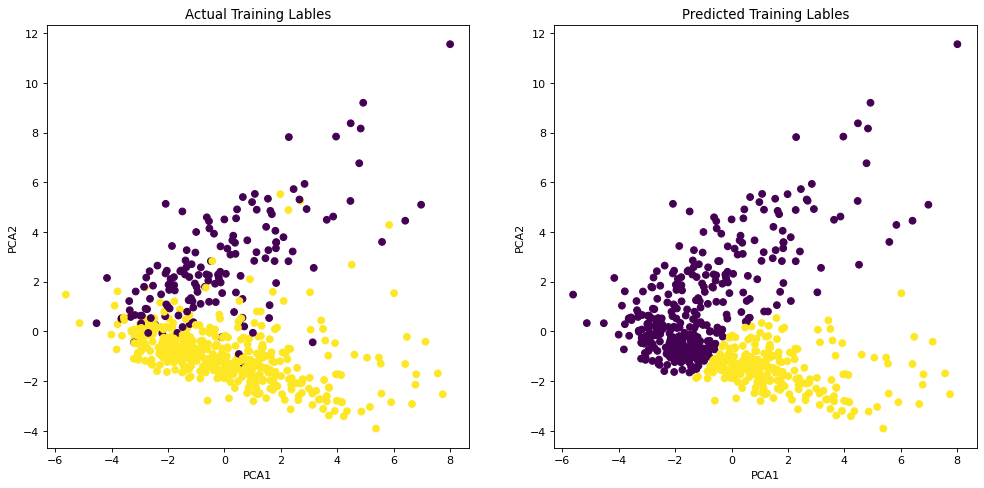

In [23]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels - 10 Points
# Visualize the predicted training labels versus actual training labels. 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.scatter(x= X_train_pca[:,0], y= X_train_pca[:,1], c=y_train)
ax2.scatter(x= X_train_pca[:,0], y =X_train_pca[:,1], c=cosine_avg)

ax1.set(xlabel='PCA1', ylabel='PCA2')
ax2.set(xlabel='PCA1', ylabel='PCA2')

ax1.title.set_text("Actual Training Lables")
ax2.title.set_text("Predicted Training Lables")

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

--> Task 3-1 Visualize Clusters :- In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. 

--> Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example

Text(0.5, 1.0, 'Predicted Kmeans Labels')

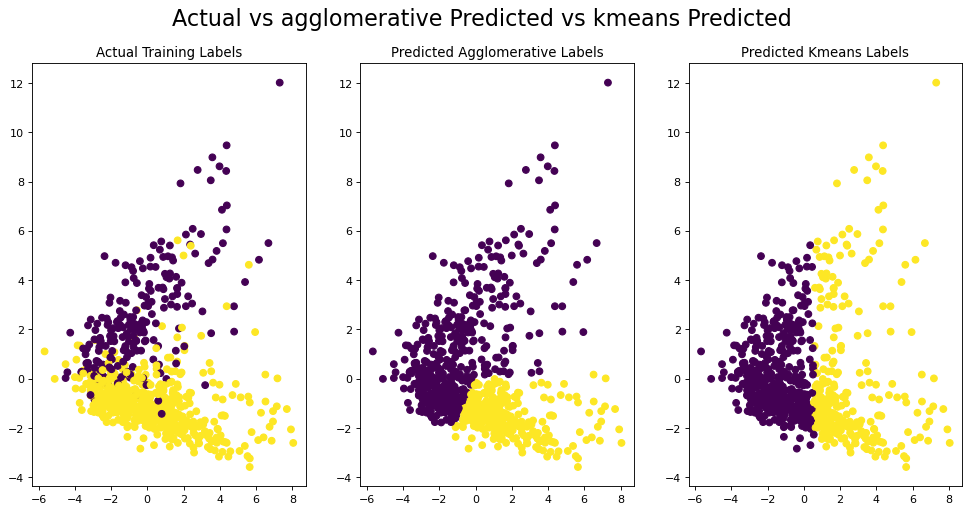

In [24]:
#####Task 3-1: Visualize the predicted training labels vs actual training labels - 10 Points

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=2021)
predicted = kmeans.fit_predict(X_pca)


### Agglomerative Clustering
# Calculate pairwise distance matrix for X
cosine_distance = pairwise_distances(X_pca, metric='cosine')
agglomerative_clustering = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)


### Visualize Clusters
#  Model and fit the data to the PCA model
x = X_pca[:,0]
y = X_pca[:,1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,7))
fig.suptitle('Actual vs agglomerative Predicted vs kmeans Predicted', fontsize= 20)

ax1.scatter(x,y, c=data['Private'])
ax1.set_title('Actual Training Labels')
ax2.scatter(x,y, c=agglomerative_clustering)
ax2.set_title('Predicted Agglomerative Labels')
ax3.scatter(x,y, c=predicted)
ax3.set_title('Predicted Kmeans Labels')


######end Task 3-1

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

In [25]:
######Task 3-b  - 10 Points
 

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print("KMeans Clustering")
print(metrics.confusion_matrix(data['Private'],predicted))
print(classification_report(data['Private'],predicted))

print("\n\nAgglomerative Clustering ")
print(metrics.confusion_matrix(data['Private'],agglomerative_clustering))
print(classification_report(data['Private'],agglomerative_clustering))



######end Task 3-b

KMeans Clustering
[[146  66]
 [351 214]]
              precision    recall  f1-score   support

           0       0.29      0.69      0.41       212
           1       0.76      0.38      0.51       565

    accuracy                           0.46       777
   macro avg       0.53      0.53      0.46       777
weighted avg       0.64      0.46      0.48       777



Agglomerative Clustering 
[[207   5]
 [275 290]]
              precision    recall  f1-score   support

           0       0.43      0.98      0.60       212
           1       0.98      0.51      0.67       565

    accuracy                           0.64       777
   macro avg       0.71      0.74      0.64       777
weighted avg       0.83      0.64      0.65       777



From the above comparison, we can see that K-means Clustering gives rise to a large number of misclassifications, whereby it incorrectly predicted **Private = No** for 351 samples and also incorrectly predicted **Private = Yes** for 66 samples.<br>
Menawhile, Agglomerative Clustering did a much better job, whereby it incorrectly predicted **Private = Yes** for only 5 samples, though it did not do a great job and incorrectly predicted **Private = No** for 275 samples